## 作業
### 請使用 application_train.csv, 根據不同的 HOUSETYPE_MODE 對 AMT_CREDIT 繪製 Histogram

# [作業目標]
- 試著調整資料, 並利用提供的程式繪製分布圖

# [作業重點]
- 如何將列出相異的 HOUSETYPE_MODE 類別 (In[3])
- 如何依照不同的 HOUSETYPE_MODE 類別指定資料, 並繪製長條圖(.hist())? (In[3])

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件

# 忽略警告訊息
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data =r"C:\Users\E2118\Documents\codevegechicken\ML_marathon\19"

In C:\Users\E2118\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\E2118\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\E2118\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\E2118\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\E2118\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [4]:
# 讀取檔案
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: C:\Users\E2118\Documents\codevegechicken\ML_marathon\19\application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


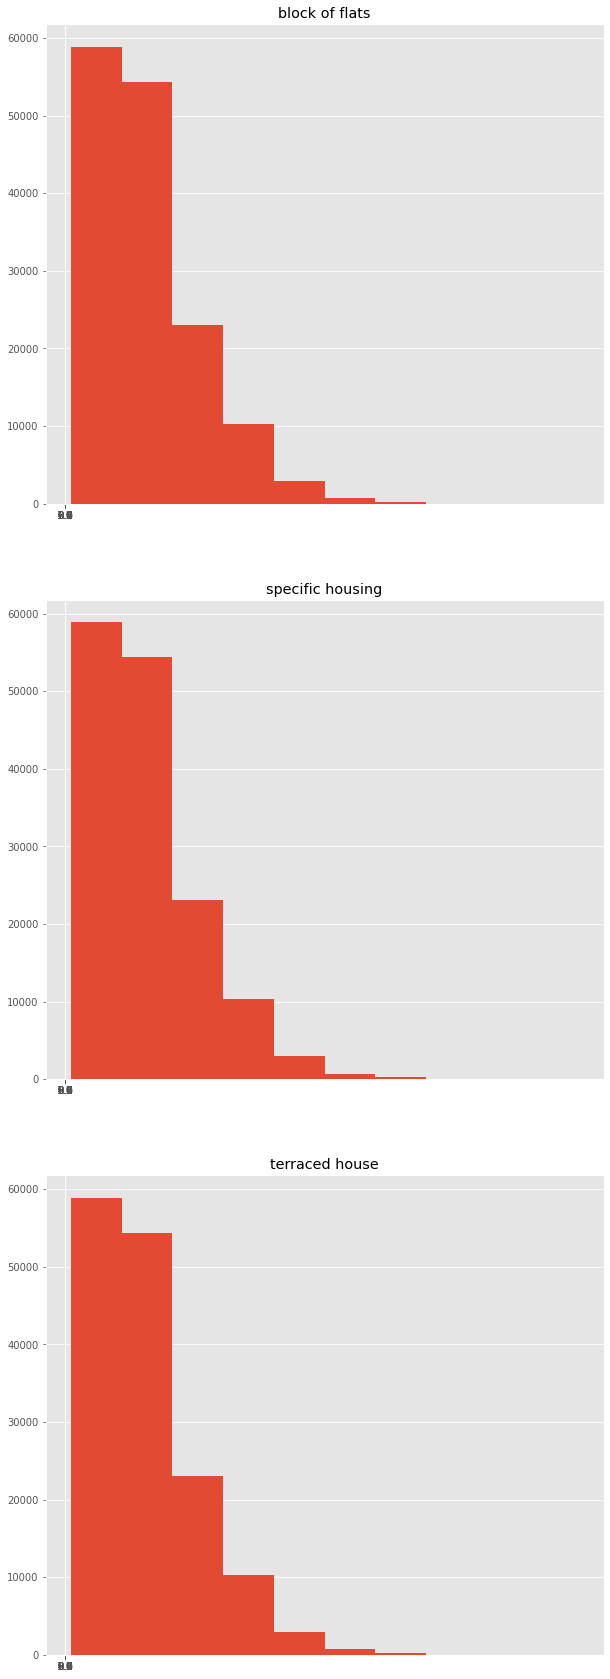

In [16]:
# 使用不同的 HOUSETYPE_MODE 類別繪製圖形, 並使用 subplot 排版

unique_house_type = ['block of flats','specific housing','terraced house']
nrows = len(unique_house_type)
ncols = nrows // 2
plt.figure(figsize=(10,30))
for i in range(len(unique_house_type)):
    plt.subplot(nrows, ncols, i+1)
    app_train.loc[[i for i in app_train.index if app_train.loc[i,"HOUSETYPE_MODE"]=='block of flats'],'AMT_CREDIT'].hist()
    #Housetypemode
    plt.title(str(unique_house_type[i]))
    plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.5,2.0,2.5,3.0])
plt.show()    

In [23]:
col_housetype=['block of flats','specific housing','terraced house']
test_unipue_housetype=app_train.groupby("HOUSETYPE_MODE")
test_unipue_housetype.size()
#plot AMT_CREDIT col


HOUSETYPE_MODE
block of flats      150503
specific housing      1499
terraced house        1212
dtype: int64

In [6]:
app_train['AMT_CREDIT'].groupby(app_train["HOUSETYPE_MODE"]).all()

HOUSETYPE_MODE
block of flats      True
specific housing    True
terraced house      True
Name: AMT_CREDIT, dtype: bool

In [12]:
app_train.loc[[i for i in app_train.index if app_train.loc[i,"HOUSETYPE_MODE"]=='block of flats'],'AMT_CREDIT']
#Housetypemode

0          406597.5
1         1293502.5
12          80865.0
13         918468.0
14         773680.5
18         157500.0
20         427500.0
22         497520.0
23         239850.0
24         247500.0
25         225000.0
26         979992.0
29         180000.0
30         665892.0
31         512064.0
32         199008.0
34        1125000.0
35         450000.0
38         247275.0
39         540000.0
40        1193580.0
43         746280.0
50         135000.0
51         675000.0
52         454500.0
54         675000.0
55         837427.5
57         247500.0
59        1227901.5
60        1663987.5
            ...    
307459     959017.5
307461     463500.0
307462    1024785.0
307463     247275.0
307464     528633.0
307465     835380.0
307466     599778.0
307467     675000.0
307468     305955.0
307469     703728.0
307474     360000.0
307475    1303200.0
307476    1762110.0
307477     796396.5
307478    1125000.0
307480    1350000.0
307482     500566.5
307483     247275.0
307486     355536.0


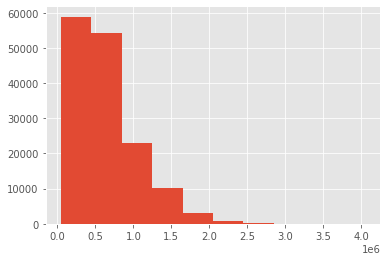

In [13]:
app_train.loc[[i for i in app_train.index if app_train.loc[i,"HOUSETYPE_MODE"]=='block of flats'],'AMT_CREDIT'].hist()
#Housetypemode